In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Assumes you already have these arrays from earlier cells -----------------
# y_te      : true QFF on test slice
# pred_all  : baseline RBF predictions (all inputs)
# pred_pso  : PSO‑RBF predictions (selected inputs)
# test_idx  : DatetimeIndex corresponding to y_te
# If they’re not yet in memory, adjust the load section below to point to your
# saved Parquet / CSV predictions.

# Fallback (uncomment & edit paths if needed):
# test_df   = pd.read_parquet("../data/processed/96749_test.parquet")
# test_idx  = pd.to_datetime(test_df["ts"])
# y_te      = test_df["QFF"].to_numpy()
# pred_all  = np.load("pred_baseline.npy")
# pred_pso  = np.load("pred_pso.npy")


In [ ]:
STATION_ID = '97230' #THIS IS IMPORTANT!

In [3]:
pred_all_df = pd.read_csv(f'/home/rzby/airpressure_ann/ann_pressure_prediction/reports/model_results/pred_all_{STATION_ID}.csv', index_col='index')

pred_pso_df = pd.read_csv(f'/home/rzby/airpressure_ann/ann_pressure_prediction/reports/model_results/pred_pso_{STATION_ID}.csv', index_col='index')

print(pred_all_df.head())
print('======OOO======')
print(pred_pso_df.head())

                                     0  PRESSURE_QFE_MB_DERIVED
index                                                          
2023-01-01 12:00:00+00:00  1129.539564                   1009.1
2023-01-01 15:00:00+00:00   815.095963                   1009.4
2023-01-01 18:00:00+00:00   814.184402                   1006.9
2023-01-01 21:00:00+00:00   729.666236                   1006.7
2023-01-02 00:00:00+00:00   881.114772                   1008.2
======OOO======
                                     0  PRESSURE_QFE_MB_DERIVED
index                                                          
2023-01-01 12:00:00+00:00  1043.578577                   1009.1
2023-01-01 15:00:00+00:00  1053.521969                   1009.4
2023-01-01 18:00:00+00:00  1080.014114                   1006.9
2023-01-01 21:00:00+00:00  1010.507268                   1006.7
2023-01-02 00:00:00+00:00  1049.398143                   1008.2


In [4]:
pred_all_df.index = pd.to_datetime(pred_all_df.index)
pred_pso_df.index = pd.to_datetime(pred_pso_df.index)

In [5]:
test_idx = pred_all_df.index
y_te = pred_all_df['PRESSURE_QFE_MB_DERIVED']
pred_all = pred_all_df['0']
pred_pso = pred_pso_df['0']

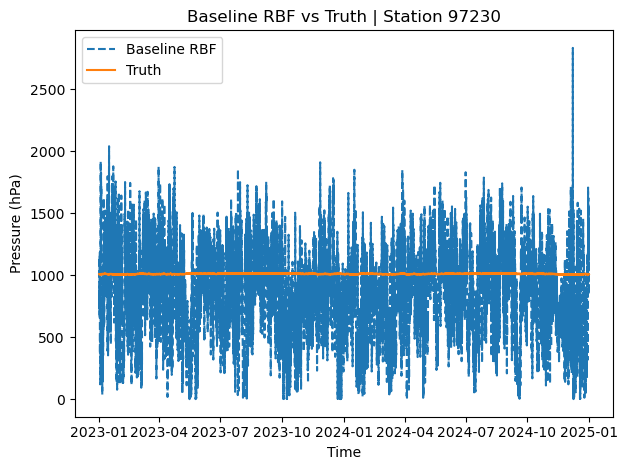

<Figure size 640x480 with 0 Axes>

In [6]:

# -----------------------------------------------------------------------------
# 1. Time‑series plot • Baseline vs truth
# -----------------------------------------------------------------------------
plt.figure()
plt.plot(test_idx, pred_all, label="Baseline RBF", linestyle="--")
plt.plot(test_idx, y_te, label="Truth")
plt.title(f"Baseline RBF vs Truth | Station {STATION_ID}")
plt.xlabel("Time")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'/home/rzby/airpressure_ann/ann_pressure_prediction/reports/figures/baseline_vs_obs_{STATION_ID}.png')


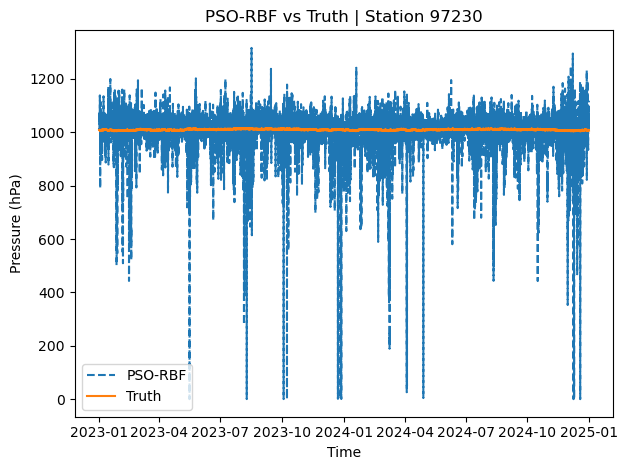

<Figure size 640x480 with 0 Axes>

In [7]:

# -----------------------------------------------------------------------------
# 2. Time‑series plot • PSO‑RBF vs truth
# -----------------------------------------------------------------------------
plt.figure()
plt.plot(test_idx, pred_pso, label="PSO‑RBF", linestyle="--")
plt.plot(test_idx, y_te, label="Truth")
plt.title(f"PSO‑RBF vs Truth | Station {STATION_ID}")
plt.xlabel("Time")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'/home/rzby/airpressure_ann/ann_pressure_prediction/reports/figures/psorbf_vs_obs_{STATION_ID}.png')


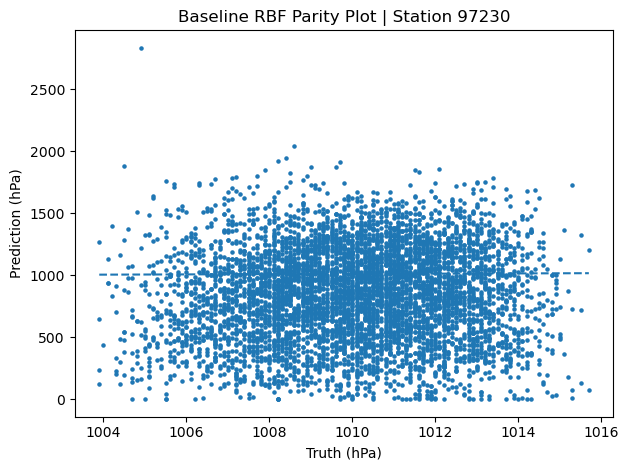

<Figure size 640x480 with 0 Axes>

In [8]:

# -----------------------------------------------------------------------------
# 3. Scatter parity plot • Baseline
# -----------------------------------------------------------------------------
plt.figure()
plt.scatter(y_te, pred_all, s=5)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], linestyle="--")
plt.title(f"Baseline RBF Parity Plot | Station {STATION_ID}")
plt.xlabel("Truth (hPa)")
plt.ylabel("Prediction (hPa)")
plt.tight_layout()
plt.show()
plt.savefig(f'/home/rzby/airpressure_ann/ann_pressure_prediction/reports/figures/baseline_scatter_{STATION_ID}.png')


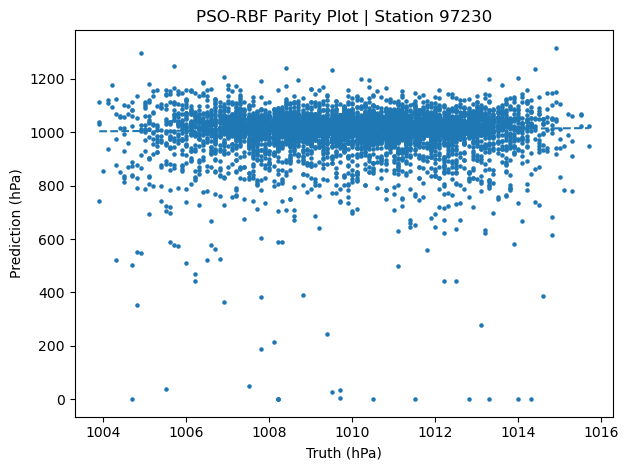

<Figure size 640x480 with 0 Axes>

In [9]:

# -----------------------------------------------------------------------------
# 4. Scatter parity plot • PSO‑RBF
# -----------------------------------------------------------------------------
plt.figure()
plt.scatter(y_te, pred_pso, s=5)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], linestyle="--")
plt.title(f"PSO‑RBF Parity Plot | Station {STATION_ID}")
plt.xlabel("Truth (hPa)")
plt.ylabel("Prediction (hPa)")
plt.tight_layout()
plt.show()
plt.savefig(f'/home/rzby/airpressure_ann/ann_pressure_prediction/reports/figures/psorbf_scatter_{STATION_ID}.png')
